In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
FILE = dir_path + '/data/' + 'soglia_diodo_decrescente.csv'

from interpolazione import RettaInterpolata, Interpolazione

In [44]:
fr = pd.read_csv(FILE)
I = np.array(fr['I(uA)']) * 10**(-6)
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = np.array(fr['V'])
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

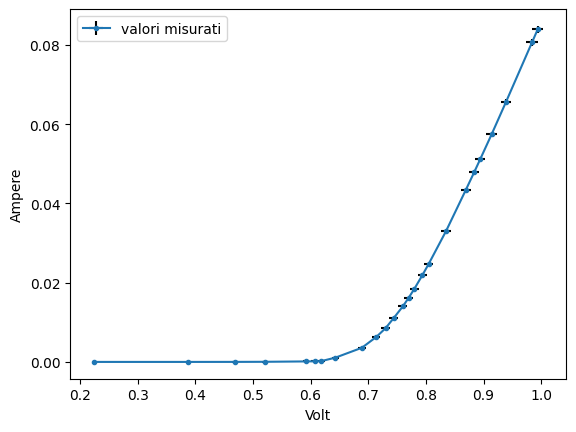

In [45]:
plt.title('')
plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,marker='.',ecolor='black', label='valori misurati')
plt.xlabel('Volt')
plt.ylabel('Ampere')
plt.legend()
plt.show()

In [53]:
def f(V,I0,coeff):
    return (I0 * (np.exp(coeff*V) - 1))

i = Interpolazione(V,I,f,sigmaI,p0=[0.000001,1])
print(i)

   
Parameters: [7.10829544e-05 7.20145544e+00] 
Sigma parameters: [2.80664533e-05 4.20859827e-01]

sigmaY: [8.3950e-04 8.0623e-04 6.5630e-04 5.7443e-04 5.1095e-04 4.7950e-04
 4.3340e-04 3.3040e-04 2.4780e-04 2.1925e-04 1.8460e-04 1.6165e-04
 1.4020e-04 1.1045e-04 8.5090e-05 6.3120e-05 3.5800e-05 1.0800e-05
 1.9000e-06 1.6100e-06 1.2700e-06 3.1380e-07 8.1300e-08 7.7000e-09
 1.0000e-10]

chiquadro ridotto: 355617878515.81
df: 23
pvalue: 0.0%
covariance matrix: [[ 6.66731117e-10 -9.96842424e-06]
 [-9.96842424e-06  1.49916902e-01]]    



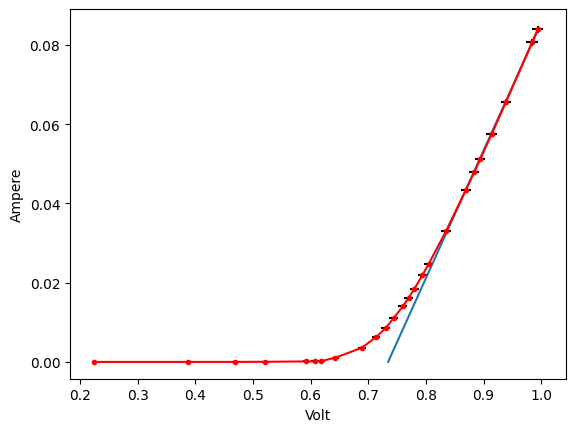


linearità A + BX
    
A: -0.2365304916486405 
B: 0.3220723277983215
sigmaA: 0.003330319254953677
sigmaB: 0.0036373351271087235

sigmaY: [0.0008395  0.00080623 0.0006563  0.00057443 0.00051095 0.0004795
 0.0004334  0.0003304 ]    
chiquadro ridotto: 0.87
df: 6
pvalue: 99.0%


In [56]:
N = 8
r = RettaInterpolata(V[:N],I[:N],sigmaI[:N])

plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,color='red',marker='.',ecolor='black')
# plt.plot(i.x_best,i.y_best, color='palegreen',label='fit')

y = np.linspace(0,I[0],100)
x = (y-r.A)/r.B

plt.plot(x,y)

plt.xlabel('Volt')
plt.ylabel('Ampere')
plt.show()

print(r)

In [48]:
# VALORE DI SOGLIOLA

sogliola = -r.A/r.B 
print('Valore di sogliola: ',sogliola)

Valore di sogliola:  0.7344017825609456
